<a href="https://colab.research.google.com/github/MykhailoMykhailiuk/DS-HW/blob/main/Hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
#Прочитайте отриману таблицю, використовуючи метод head
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

file_path = "/content/drive/My Drive/2017_jun_final - 2017_jun_final.csv"
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [2]:
#Визначте розмір таблиці за допомогою методу shape
rows, cols = df.shape
print(f'{rows} - рядків, {cols} - стовпців')

8704 - рядків, 25 - стовпців


In [3]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [4]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df.isnull().sum() / len(df)

N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Спеціалізація                       0.829389
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Університет                         0.041131
Ще студент                          0.000000
Рівень англійської                  0.000000
Предметна область                   0.025620
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [5]:
#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
col_miss = df.columns[df.isnull().any()].tolist()
col_to_drop = [col for col in col_miss if col != "Мова програмування"]
df = df.drop(columns=col_to_drop)
df

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харків,до 10 осіб,Аутсорсингова,жіноча,20,Неповна Вища,True,Pre-intermediate (нище середнього),12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,Аутсорсингова,жіноча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,1,менше 3 місяців,700,700,Одеса,до 50 осіб,Аутсорсингова,чоловіча,23,Вища,False,Intermediate (середній),12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700
8700,8701,Marketing,NaN,0.5,0.5,400,120,Київ,до 50 осіб,Продуктова,жіноча,22,Вища,False,Pre-intermediate (нище середнього),12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львів,до 10 осіб,Аутстафінгова,чоловіча,30,Неповна Вища,False,Upper-Intermediate (вище середнього),12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800
8702,8703,Team lead,NaN,6,4,2600,0,Дніпро,більше 1000 осіб,Аутсорсингова,чоловіча,34,Вища,False,Advanced (просунутий),12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600


In [6]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
df.isnull().sum() / len(df)

N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Ще студент                          0.000000
Рівень англійської                  0.000000
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64

In [7]:
#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
df = df.dropna()
df

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,менше 3 місяців,600,100,Хмельницький,до 50 осіб,Аутсорсингова,чоловіча,23,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Київ,до 10 осіб,Продуктова,чоловіча,28,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,8693,Software Engineer,Java,5,1,3500,650,Віддалено,до 200 осіб,Аутсорсингова,жіноча,28,Вища,False,Intermediate (середній),12/07/2017 13:26:49,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,3500
8694,8695,Junior Software Engineer,C#/.NET,1,1,550,550,Харків,до 200 осіб,Аутсорсингова,чоловіча,23,Вища,False,Pre-intermediate (нище середнього),12/07/2017 14:14:33,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) ...,1.0,1.0,550
8695,8696,Software Engineer,Python,1,0.5,1500,1000,Київ,до 10 осіб,Стартап,чоловіча,29,Вища,False,Intermediate (середній),12/07/2017 14:39:21,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,1500
8701,8702,Junior Software Engineer,Ruby/Rails,1,0.5,800,500,Львів,до 10 осіб,Аутстафінгова,чоловіча,30,Неповна Вища,False,Upper-Intermediate (вище середнього),12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800


In [8]:
#Визначте новий розмір таблиці за допомогою методу shape
rows, cols = df.shape
print(f'{rows} - рядків, {cols} - стовпців')

4854 - рядків, 20 - стовпців


In [9]:
#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = df[df["Мова програмування"] == "Python"]
python_data

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,чоловіча,26,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Київ,до 10 осіб,Стартап,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Київ,до 10 осіб,Аутсорсингова,чоловіча,19,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Київ,до 1000 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,False,Intermediate (середній),12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Київ,до 10 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,5,1,2000,800,Запоріжжя,до 50 осіб,Аутсорсингова,чоловіча,22,Неповна Вища,False,Intermediate (середній),10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
8625,8626,Software Engineer,Python,4,1,1750,0,Київ,більше 1000 осіб,Аутсорсингова,чоловіча,28,Середня,False,Intermediate (середній),11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
8635,8636,Senior Software Engineer,Python,10 і більше років,менше 3 місяців,4000,1300,Віддалено,до 10 осіб,Стартап,чоловіча,33,Вища,False,Upper-Intermediate (вище середнього),11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
8673,8674,Junior Software Engineer,Python,0.5,0.5,350,50,Київ,до 50 осіб,Аутсорсингова,чоловіча,22,Вища,False,Intermediate (середній),12/07/2017 9:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


In [10]:
#Визначте розмір таблиці python_data за допомогою методу shape
rows, cols = python_data.shape
print(f"Розмір таблиці python_data: {rows} - рядків, {cols} - стовпців")

Розмір таблиці python_data: 207 - рядків, 20 - стовпців


In [11]:
#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
python_data_grouped = python_data.groupby("Посада")
python_data_grouped.groups

{'Junior Software Engineer': [87, 114, 143, 162, 171, 283, 332, 347, 534, 688, 715, 833, 1003, 1108, 1187, 1194, 1603, 1614, 1652, 1681, 1695, 1733, 1914, 2133, 2187, 2795, 2834, 2908, 2959, 2983, 3149, 3158, 3267, 3542, 3679, 3780, 3821, 3871, 4186, 4730, 4855, 4952, 4971, 4973, 5173, 5246, 5257, 5529, 5835, 6026, 6061, 6252, 6345, 6533, 7049, 7140, 7159, 7399, 7457, 7473, 8502, 8523, 8673], 'Senior Software Engineer': [302, 373, 1172, 1363, 1489, 1954, 2165, 2289, 2387, 2837, 2946, 3176, 3722, 4649, 4888, 5524, 5643, 5716, 6283, 6497, 6549, 6714, 6729, 6789, 7098, 7783, 8073, 8117, 8120, 8225, 8635], 'Software Engineer': [12, 68, 153, 217, 387, 449, 565, 572, 604, 669, 679, 696, 728, 855, 870, 953, 1021, 1080, 1138, 1392, 1578, 1586, 1748, 1937, 2014, 2021, 2184, 2192, 2224, 2244, 2286, 2350, 2356, 2433, 2454, 2463, 2474, 2557, 2652, 2661, 2768, 2781, 2904, 3044, 3050, 3156, 3232, 3415, 3480, 3482, 3488, 3523, 3532, 3621, 3658, 3827, 3838, 3854, 3874, 3995, 4025, 4079, 4236, 4265, 45

In [12]:
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада",
#виконайте агрегацію даних за допомогою методу agg
#і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
new_df = python_data_grouped.agg({'Зарплата на місяць': [min, max]})
new_df

Зарплата на місяць      
                                        min   max
Посада                                           
Junior Software Engineer                100  1250
Senior Software Engineer               1300  9200
Software Engineer                       500  5400
System Architect                       3000  5000
Technical Lead                         1425  6200

In [13]:
#Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць.
#Використовуйте її для методу apply та створіть новий стовпчик "avg"
def fill_avg_salary(row):
  return int((row["min"] + row["max"]) / 2)

new_df['avg'] = new_df["Зарплата на місяць"].apply(fill_avg_salary, axis=1)
new_df

Зарплата на місяць         avg
                                        min   max      
Посада                                                 
Junior Software Engineer                100  1250   675
Senior Software Engineer               1300  9200  5250
Software Engineer                       500  5400  2950
System Architect                       3000  5000  4000
Technical Lead                         1425  6200  3812

In [14]:
#Створіть описову статистику за допомогою методу describe для нового стовпчика.
new_df["avg"].describe()

count       5.000000
mean     3337.400000
std      1700.056999
min       675.000000
25%      2950.000000
50%      3812.000000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

In [15]:
#Збережіть отриману таблицю в CSV файл
new_df.to_csv("/content/drive/My Drive/new_df.csv")
#https://drive.google.com/file/d/1-AbgnfpqD9LYZnKqXmGD7JdOIlQPMltc/view?usp=sharing

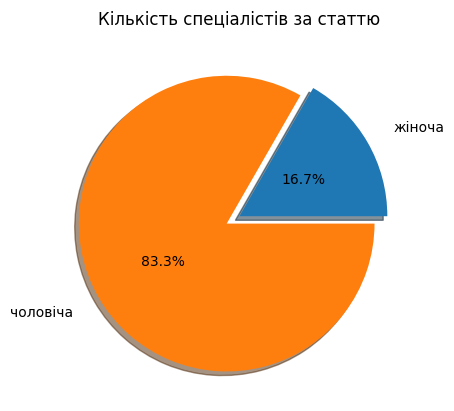

In [28]:
#Plot 1
sex = df.groupby('Стать').agg({'N': 'count'}).reset_index()
sex.columns = ['Стать', 'Кількість']
explode = [0, 0.1]
plt.pie(
    sex['Кількість'],
    labels=sex['Стать'],
    autopct='%.1f%%',
    shadow=True,
    pctdistance=0.5,
    labeldistance=1.2,
    explode=explode,
)
plt.title('Кількість спеціалістів за статтю')
plt.show()

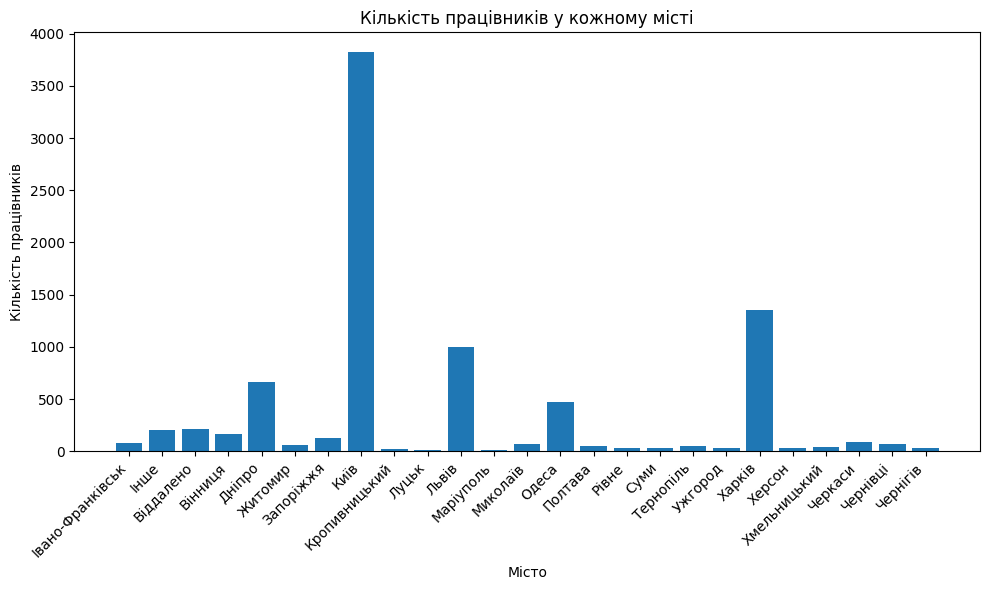

In [45]:
#Plot 2
city = df.groupby('Місто').agg({'N': 'count'}).reset_index()
city.columns = ['Місто', 'Кількість']
plt.figure(figsize=(10, 6))
plt.bar(
    city['Місто'],
    city['Кількість']
)
plt.xlabel('Місто')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Кількість працівників')
plt.title('Кількість працівників у кожному місті')
plt.tight_layout()
plt.show()

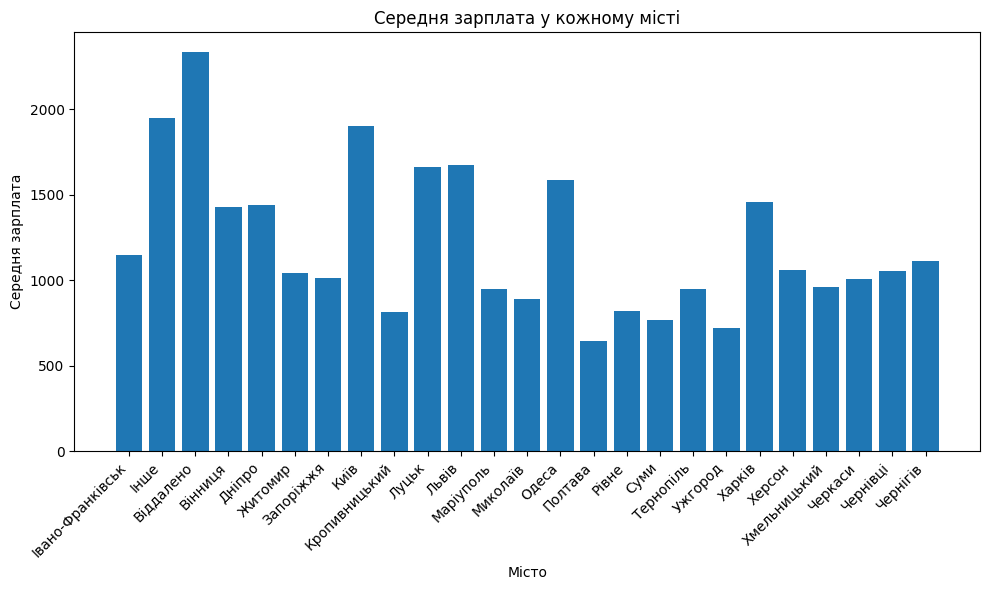

In [47]:
#Plot 3
city = df.groupby('Місто').agg({'Зарплата на місяць': 'mean'}).reset_index()
city.columns = ['Місто', 'Середня зарплата']
plt.figure(figsize=(10, 6))
plt.bar(
    city['Місто'],
    city['Середня зарплата']
)
plt.xlabel('Місто')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Середня зарплата')
plt.title('Середня зарплата у кожному місті')
plt.tight_layout()
plt.show()